In [1]:
from utils import *

## Exercice 1 - Fichier `mouse.txt`

In [2]:
# 1. Charger les données
data = load_data('data/mouse.txt')

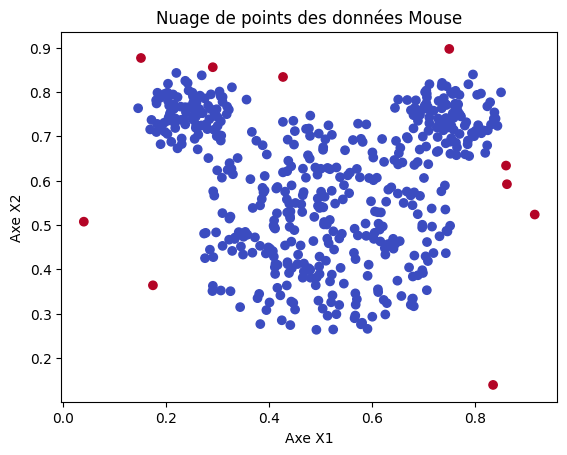

In [3]:
# 2. Visualiser les données
plot_data(data, title="Nuage de points des données Mouse")

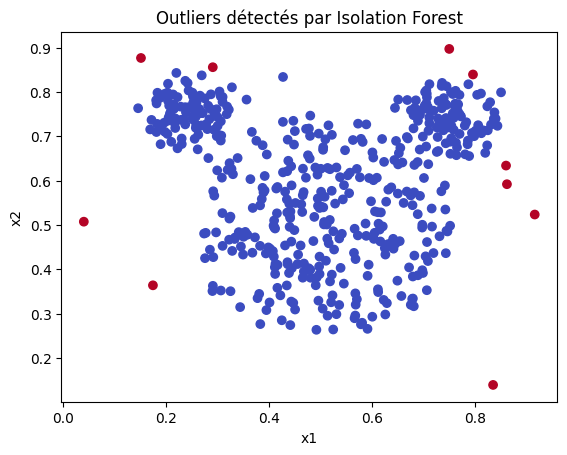

In [4]:
# 3. Détecter les outliers avec Isolation Forest
data, iso_scores = detect_outliers_isolation_forest(data)
plot_outliers(data, method='iso')

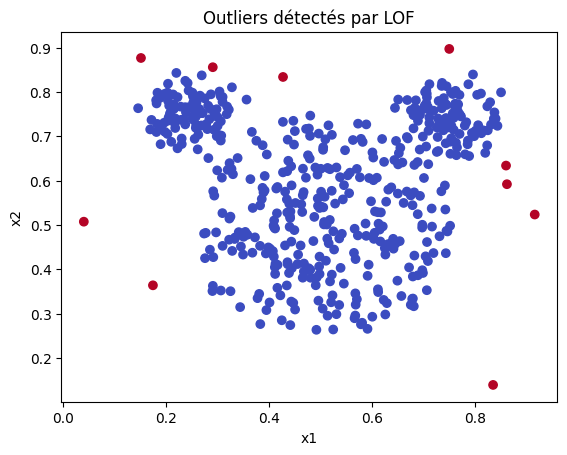

In [5]:
# 4. Détecter les outliers avec LOF
data, lof_scores = detect_outliers_lof(data)
plot_outliers(data, method='lof')

In [6]:
data.iloc[-10:]

x1        x2  true_outlier  iso_outlier  lof_outlier
490  0.290950  0.855767            -1           -1           -1
491  0.750068  0.897028            -1           -1           -1
492  0.040555  0.507240            -1           -1           -1
493  0.835162  0.138940            -1           -1           -1
494  0.174740  0.363686            -1           -1           -1
495  0.151506  0.876586            -1           -1           -1
496  0.860308  0.633833            -1           -1           -1
497  0.862083  0.591805            -1           -1           -1
498  0.916030  0.523391            -1           -1           -1
499  0.427325  0.833767            -1            1           -1

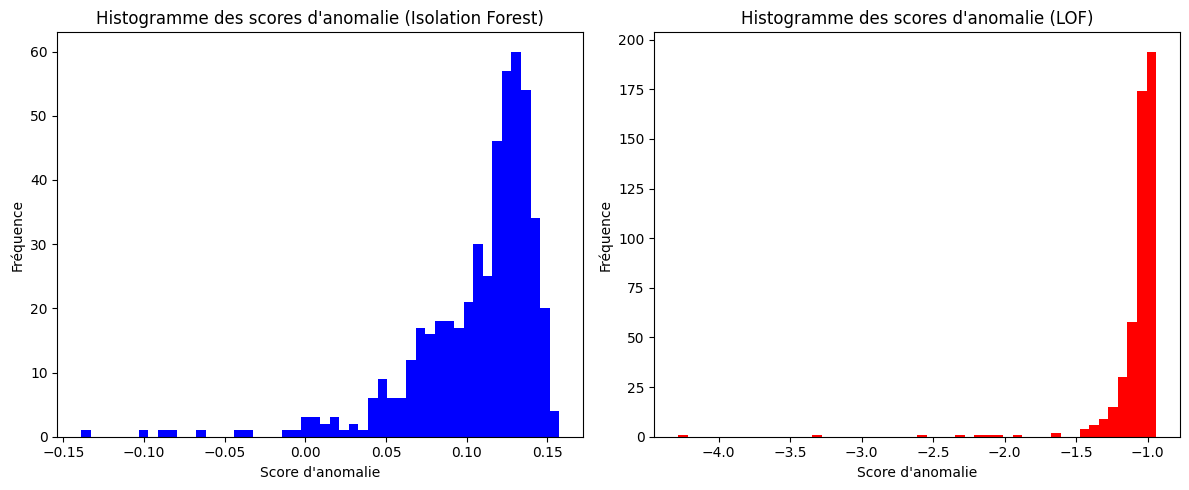

In [7]:
# 5. Afficher les histogrammes des scores d'anomalie
plot_anomaly_scores(iso_scores, lof_scores)



In [8]:
# Ajuster le seuil avec K-Means pour Isolation Forest
iso_kmeans_outliers, iso_kmeans_threshold = adjust_threshold_with_kmeans(data, iso_scores)

# Ajuster le seuil avec IQR pour Isolation Forest
iso_iqr_outliers, iso_iqr_threshold = adjust_threshold_with_iqr(data, iso_scores)

# Ajuster le seuil avec K-Means pour LOF
lof_kmeans_outliers, lof_kmeans_threshold = adjust_threshold_with_kmeans(data, lof_scores)

# Ajuster le seuil avec IQR pour LOF
lof_iqr_outliers, lof_iqr_threshold = adjust_threshold_with_iqr(data, lof_scores)

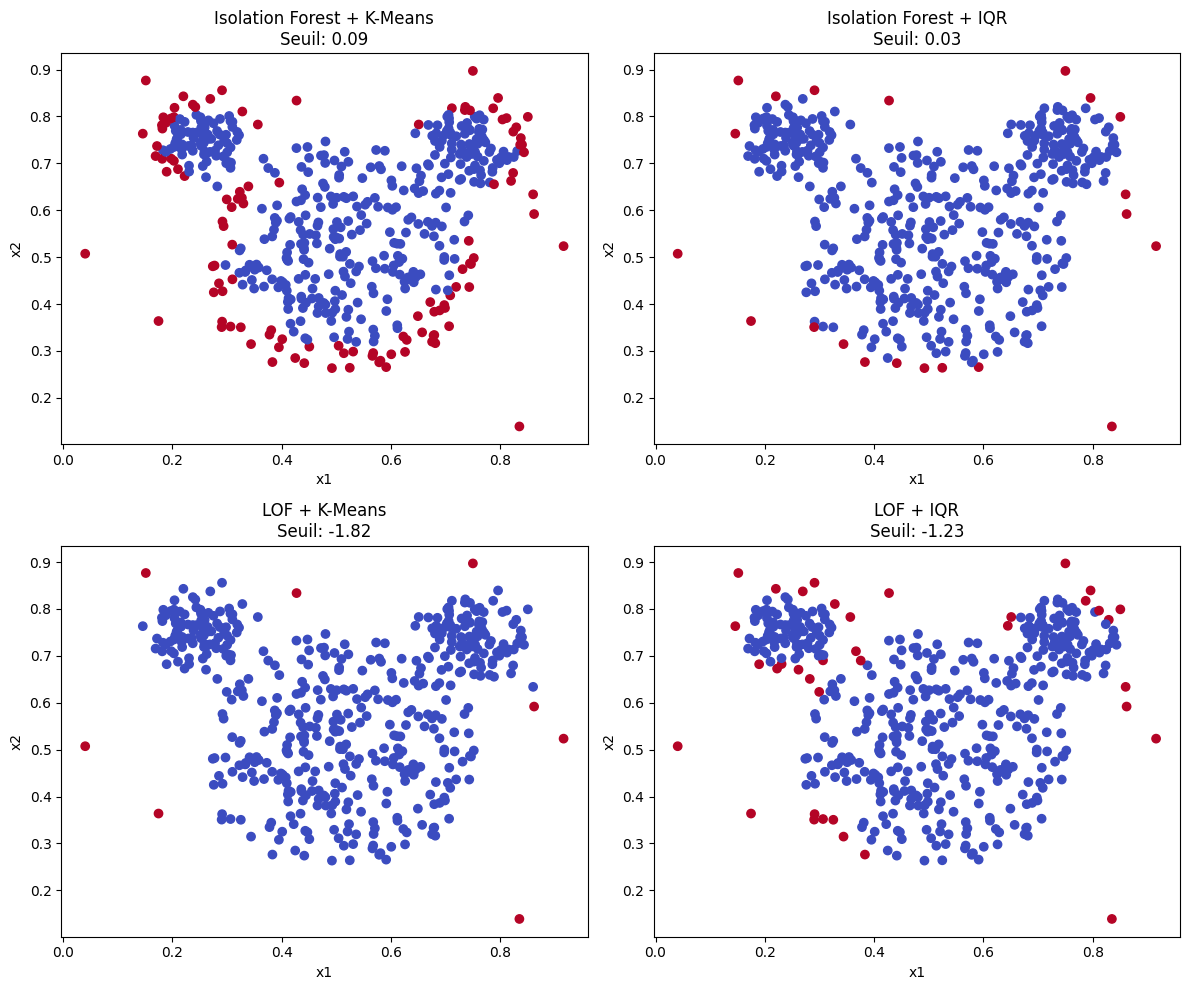

In [9]:
# Visualiser les résultats
plot_unsupervised_results(data, iso_kmeans_outliers, iso_kmeans_threshold, iso_iqr_outliers, iso_iqr_threshold,
             lof_kmeans_outliers, lof_kmeans_threshold, lof_iqr_outliers, lof_iqr_threshold)

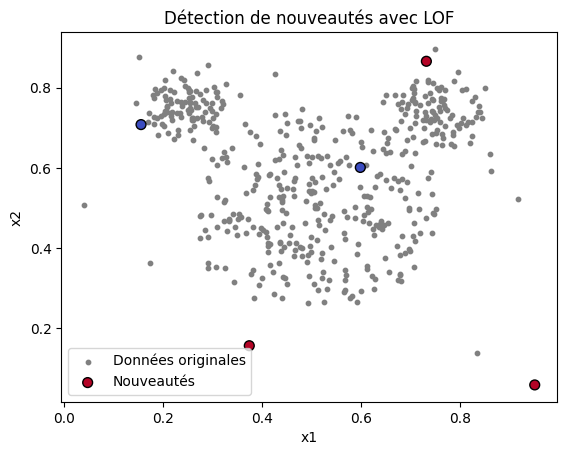

In [10]:
# 8. Détecter des nouveautés avec LOF

new_data = create_new_data(5)
novelty_scores = detect_novelty_lof(data, new_data)
plot_novelty_detection(data, new_data, novelty_scores)

## Exercice 2 - Partie 1 - Fichier `creditcard.csv`

In [11]:
# 1. Charger les données
data = load_data('data/creditcard.csv')

In [12]:
# Prétraiter les données
X_scaled, y = preprocess_data(data)

# Séparer les données
X_train, X_test, y_train, y_test = split_data(X_scaled, y)

print("Comptage des classes dans y_train :")
print(Counter(y_train))


Comptage des classes dans y_train :
Counter({0: 227451, 1: 394})


EasyEnsemble Results:
Confusion Matrix:
[[54870  1994]
 [    8    90]]
F1-score: 0.0825
ROC AUC: 0.9750
Average Precision: 0.7487
Balanced Accuracy: 0.9417



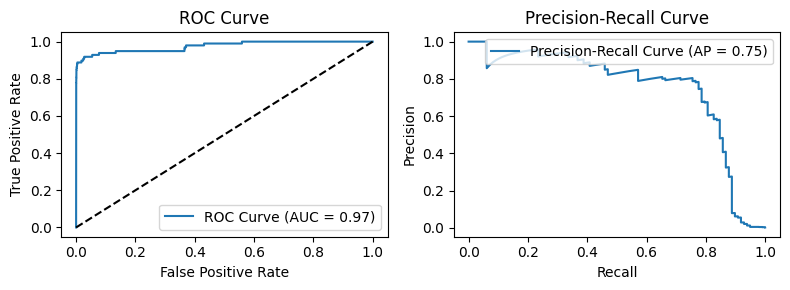

IsolationForest Results:
Confusion Matrix:
[[56797    67]
 [   66    32]]
F1-score: 0.3249
ROC AUC: 0.9528
Average Precision: 0.1714
Balanced Accuracy: 0.6627



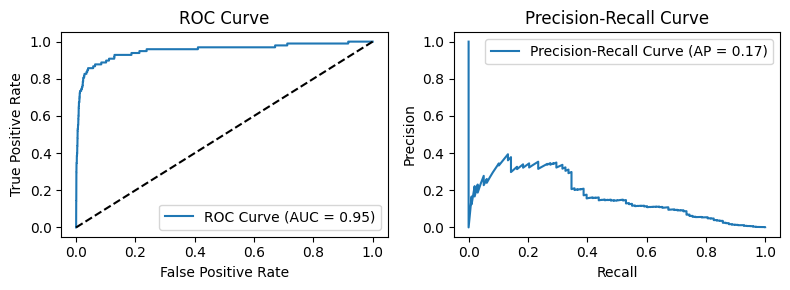

LOF Results:
Confusion Matrix:
[[52606  4258]
 [   83    15]]
F1-score: 0.0069
ROC AUC: 0.4856
Average Precision: 0.0021
Balanced Accuracy: 0.5391



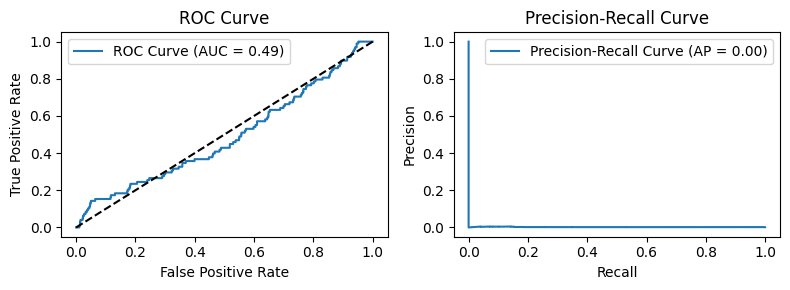

XGBoost Results:
Confusion Matrix:
[[56853    11]
 [   15    83]]
F1-score: 0.8646
ROC AUC: 0.9691
Average Precision: 0.8812
Balanced Accuracy: 0.9234



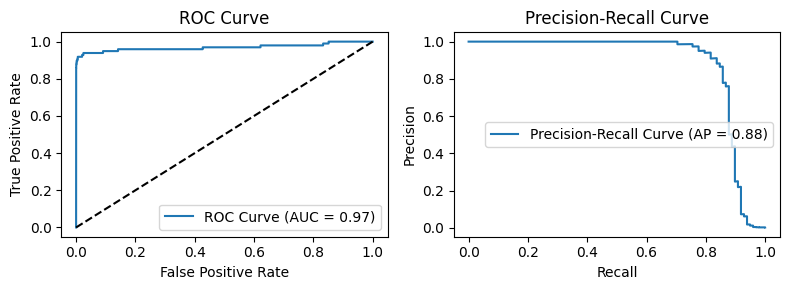

RandomForest Results:
Confusion Matrix:
[[56861     3]
 [   24    74]]
F1-score: 0.8457
ROC AUC: 0.9580
Average Precision: 0.8483
Balanced Accuracy: 0.8775



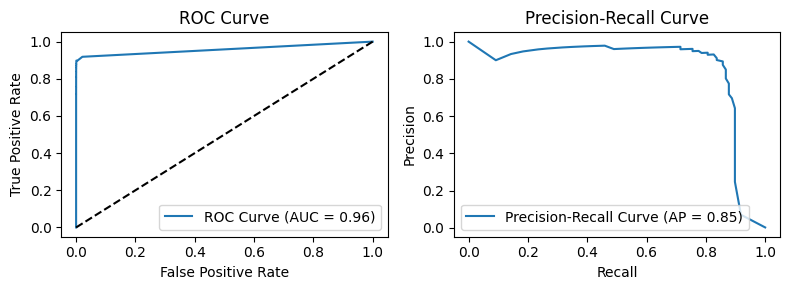

TomekLinks Results:
Confusion Matrix:
[[56856     8]
 [   20    78]]
F1-score: 0.8478
ROC AUC: 0.9758
Average Precision: 0.8767
Balanced Accuracy: 0.8979



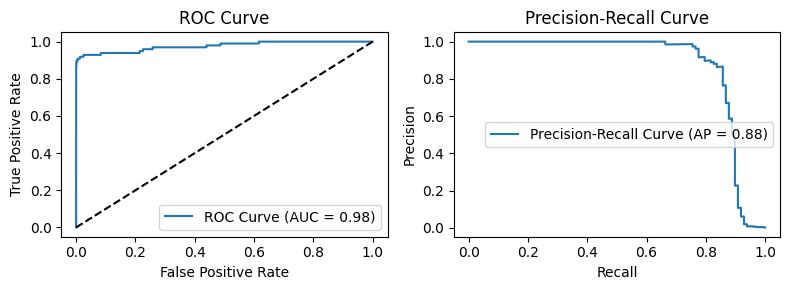

SMOTE Results:
Confusion Matrix:
[[56828    36]
 [   14    84]]
F1-score: 0.7706
ROC AUC: 0.9751
Average Precision: 0.8659
Balanced Accuracy: 0.9283



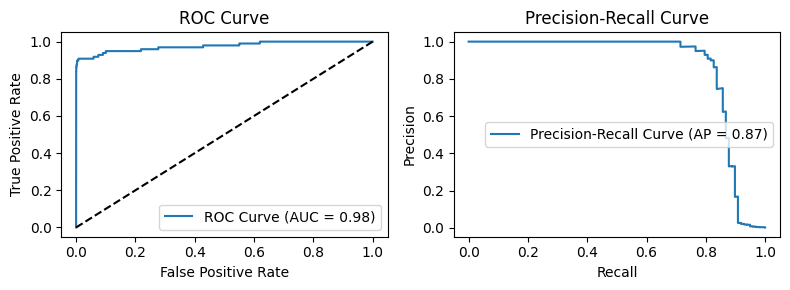

In [13]:
# Définir les modèles à tester
models = {
    'EasyEnsemble': train_easy_ensemble(X_train, y_train),
    'IsolationForest': train_isolation_forest(X_train, contamination=0.00172),
    'LOF': train_lof(X_train),
    'XGBoost': train_xgboost(X_train, y_train),
    'RandomForest': train_random_forest(X_train, y_train),
    'TomekLinks': train_with_tomek_links(X_train, y_train),
    'SMOTE': train_with_smote(X_train, y_train)
}

# Evaluation des modèles
result_evaluation(models, X_train, X_test, y_train, y_test)



In [14]:
# Cross validation sur les modèles
result_cross_val(models, X_scaled, y)


EasyEnsemble Cross-Validation Results:
F1-score: 0.0868
ROC AUC: 0.9772
Average Precision: 0.7480
Balanced Accuracy: 0.9373

XGBoost Cross-Validation Results:
F1-score: 0.7985
ROC AUC: 0.9795
Average Precision: 0.8047
Balanced Accuracy: 0.9041

RandomForest Cross-Validation Results:
F1-score: 0.7885
ROC AUC: 0.9441
Average Precision: 0.7584
Balanced Accuracy: 0.8575

TomekLinks Cross-Validation Results:
F1-score: 0.8157
ROC AUC: 0.9788
Average Precision: 0.8181
Balanced Accuracy: 0.8930

SMOTE Cross-Validation Results:
F1-score: 0.8157
ROC AUC: 0.9788
Average Precision: 0.8181
Balanced Accuracy: 0.8930



## Exercice 2 - Partie 2 - Fichier `KDDCup99.csv`

In [15]:
data = load_data('data/KDDCup99.csv')

In [16]:
# Prétraiter les données
X_scaled, y = preprocess_data(data)

# Séparer les données
X_train, X_test, y_train, y_test = split_data(X_scaled, y)

print("Comptage des classes dans y_train :")
print(Counter(y_train))


Comptage des classes dans y_train :
Counter({0: 317394, 1: 77822})


EasyEnsemble Results:
Confusion Matrix:
[[78858   491]
 [   10 19445]]
F1-score: 0.9873
ROC AUC: 0.9999
Average Precision: 0.9997
Balanced Accuracy: 0.9966



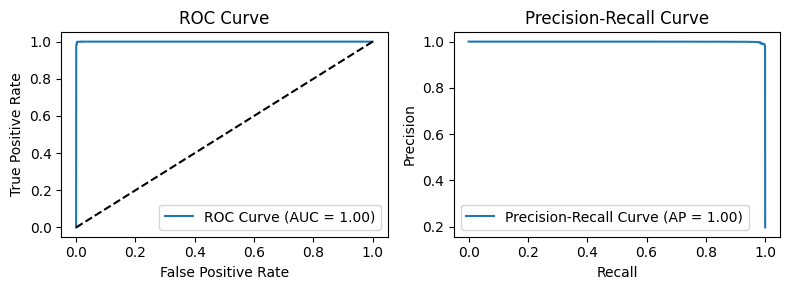

IsolationForest Results:
Confusion Matrix:
[[79181   168]
 [19455     0]]
F1-score: 0.0000
ROC AUC: 0.8074
Average Precision: 0.4328
Balanced Accuracy: 0.4989



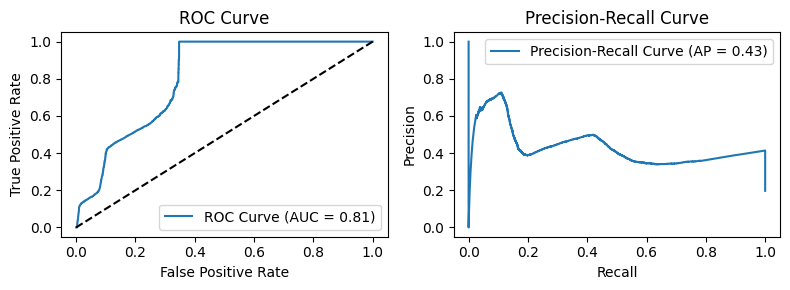

LOF Results:
Confusion Matrix:
[[76524  2825]
 [17352  2103]]
F1-score: 0.1725
ROC AUC: 0.6836
Average Precision: 0.3782
Balanced Accuracy: 0.5362



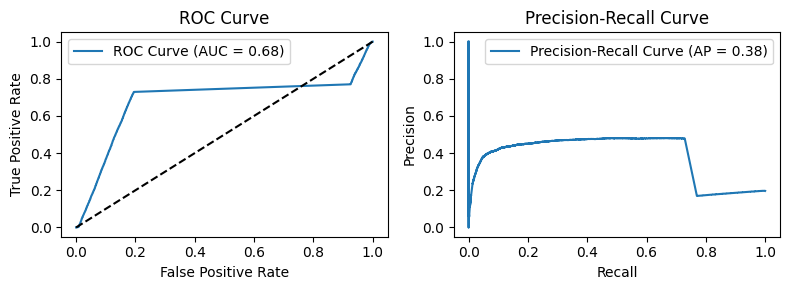

XGBoost Results:
Confusion Matrix:
[[79339    10]
 [    4 19451]]
F1-score: 0.9996
ROC AUC: 1.0000
Average Precision: 1.0000
Balanced Accuracy: 0.9998



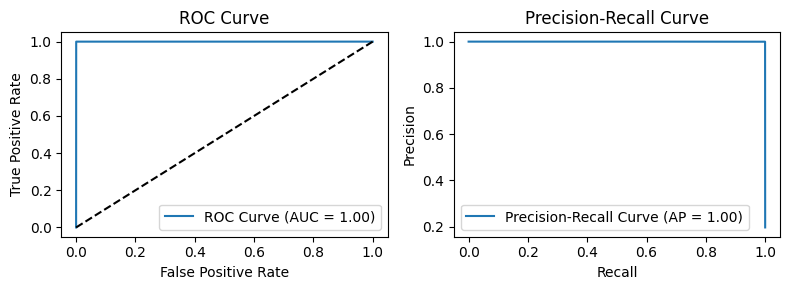

RandomForest Results:
Confusion Matrix:
[[79336    13]
 [    6 19449]]
F1-score: 0.9995
ROC AUC: 1.0000
Average Precision: 1.0000
Balanced Accuracy: 0.9998



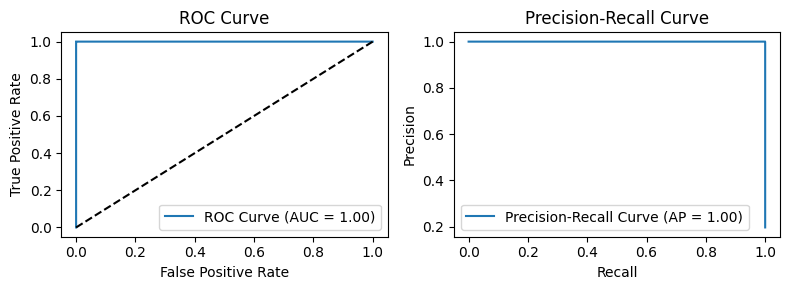

TomekLinks Results:
Confusion Matrix:
[[79339    10]
 [    4 19451]]
F1-score: 0.9996
ROC AUC: 1.0000
Average Precision: 1.0000
Balanced Accuracy: 0.9998



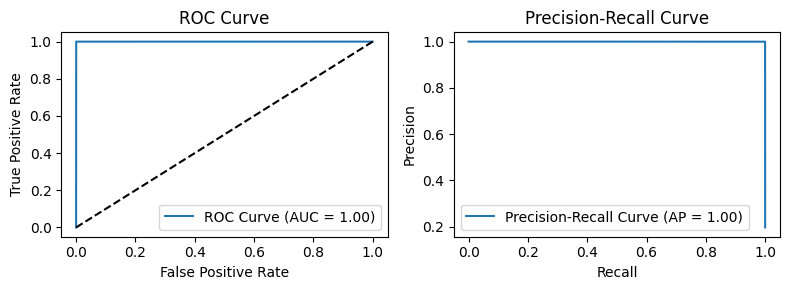

SMOTE Results:
Confusion Matrix:
[[79336    13]
 [    4 19451]]
F1-score: 0.9996
ROC AUC: 1.0000
Average Precision: 1.0000
Balanced Accuracy: 0.9998



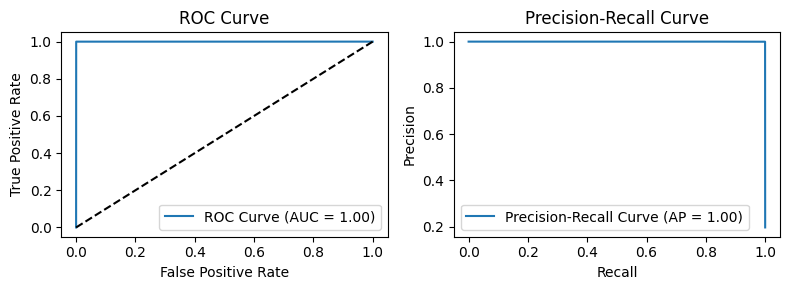

In [17]:
# Définir les modèles à tester
models = {
    'EasyEnsemble': train_easy_ensemble(X_train, y_train),
    'IsolationForest': train_isolation_forest(X_train, contamination=0.00172),
    'LOF': train_lof(X_train),
    'XGBoost': train_xgboost(X_train, y_train),
    'RandomForest': train_random_forest(X_train, y_train),
    'TomekLinks': train_with_tomek_links(X_train, y_train),
    'SMOTE': train_with_smote(X_train, y_train)
}

# Evaluation des modèles
result_evaluation(models, X_train, X_test, y_train, y_test)

In [18]:
# Cross validation sur les modèles
result_cross_val(models, X_scaled, y)

EasyEnsemble Cross-Validation Results:
F1-score: 0.9778
ROC AUC: 0.9998
Average Precision: 0.9994
Balanced Accuracy: 0.9938

XGBoost Cross-Validation Results:
F1-score: 0.9931
ROC AUC: 0.9996
Average Precision: 0.9981
Balanced Accuracy: 0.9979

RandomForest Cross-Validation Results:
F1-score: 0.9930
ROC AUC: 0.9994
Average Precision: 0.9954
Balanced Accuracy: 0.9981

TomekLinks Cross-Validation Results:
F1-score: 0.9931
ROC AUC: 0.9997
Average Precision: 0.9987
Balanced Accuracy: 0.9979

SMOTE Cross-Validation Results:
F1-score: 0.9931
ROC AUC: 0.9997
Average Precision: 0.9987
Balanced Accuracy: 0.9979

